In [1]:
# Data_Set -> Churn_Modelling.csv

In [2]:
# Linear Regression
# SVR (Support Vector Regression)
# Random Forest
# XGBoost
# KNN

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix , classification_report

In [4]:
df = pd.read_csv('c:/users/saini/Downloads/Churn_Modelling.csv')

In [5]:
df.shape

(10000, 14)

In [6]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [7]:
# There is no null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# There is not any Duplicate Column
df.duplicated().sum()

0

In [9]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [10]:
# Removing Unwanted Columns
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [11]:
df.shape

(10000, 11)

In [12]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df.select_dtypes(include='object').head(4)

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female


In [16]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
oe = OrdinalEncoder()

In [19]:
ct = make_column_transformer(
    (oe,['Geography']),
    (oe,['Gender']),
    remainder = 'passthrough'
)

In [20]:
ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder-1', OrdinalEncoder(),
                                 ['Geography']),
                                ('ordinalencoder-2', OrdinalEncoder(),
                                 ['Gender'])])

In [21]:
df = ct.fit_transform(df)

In [22]:
df.head(4)

,ordinalencoder-1__Geography,ordinalencoder-2__Gender,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Exited
0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88,1
1,2.0,0.0,608,41,1,83807.86,1,0,1,112542.58,0
2,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1
3,0.0,0.0,699,39,1,0.00,2,0,0,93826.63,0


In [23]:
train = df.drop(columns=['remainder__Exited'])

In [24]:
test = df['remainder__Exited']

In [25]:
test.head(4)

0    1
1    0
2    1
3    0
Name: remainder__Exited, dtype: int64

In [26]:
train.head(4)

,ordinalencoder-1__Geography,ordinalencoder-2__Gender,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88
1,2.0,0.0,608,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57
3,0.0,0.0,699,39,1,0.00,2,0,0,93826.63


In [27]:
scaler = MinMaxScaler()

In [28]:
train = pd.DataFrame(scaler.fit_transform(train),columns=train.columns)

In [29]:
train.head()

,ordinalencoder-1__Geography,ordinalencoder-2__Gender,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,0.0,0.0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,1.0,0.0,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.0,0.0,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.0,0.0,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.0,0.0,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [30]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=42)

In [31]:
# For training Purpose
X_train.shape , y_train.shape

((8000, 10), (8000,))

In [32]:
# For Testing
X_test.shape , y_test.shape

((2000, 10), (2000,))

In [33]:
lr = LogisticRegression()
svr = SVC()
rfc = RandomForestClassifier()
xgb = xg.XGBClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1785
           1       0.33      0.60      0.42       215

    accuracy                           0.82      2000
   macro avg       0.64      0.72      0.66      2000
weighted avg       0.88      0.82      0.85      2000



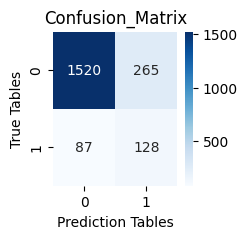

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1556
           1       0.52      0.46      0.49       444

    accuracy                           0.79      2000
   macro avg       0.68      0.67      0.68      2000
weighted avg       0.78      0.79      0.78      2000



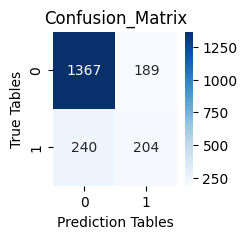

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1716
           1       0.49      0.68      0.57       284

    accuracy                           0.86      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.88      0.86      0.86      2000



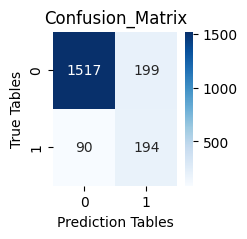

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1891
           1       0.17      0.61      0.27       109

    accuracy                           0.82      2000
   macro avg       0.57      0.72      0.58      2000
weighted avg       0.93      0.82      0.86      2000



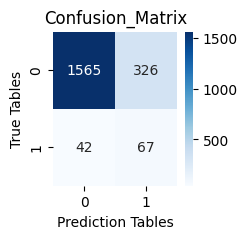

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1849
           1       0.32      0.83      0.46       151

    accuracy                           0.85      2000
   macro avg       0.65      0.84      0.69      2000
weighted avg       0.93      0.85      0.88      2000



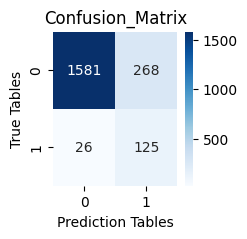

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1770
           1       0.45      0.77      0.57       230

    accuracy                           0.87      2000
   macro avg       0.71      0.83      0.75      2000
weighted avg       0.91      0.87      0.88      2000



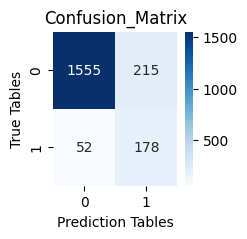

In [34]:
models = [knn,dtc,xgb,lr,svr,rfc]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred,y_test)
    cr = classification_report(y_pred,y_test)
    print(cr)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
    plt.xlabel('Prediction Tables')
    plt.ylabel('True Tables')
    plt.title('Confusion_Matrix')
    plt.show()